### This project focuses on analyzing patient health data, where we will use `KNN Classification` to predict the presence of heart disease (target) based on various medical attributes such as age, sex, cholesterol, blood pressure, and exercise-induced factors.

### Import required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### load the `heart.csv` file using pandas

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sherians/datasets/heart.csv')

**View the top 5 rows of the dataset**

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Check if there is any kind of null value present in our dataset or not**

In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Let's visualize the distribution of patients' ages using a histogram `histplot()`. This will help us understand how ages are spread across the dataset.

<Axes: xlabel='age', ylabel='Count'>

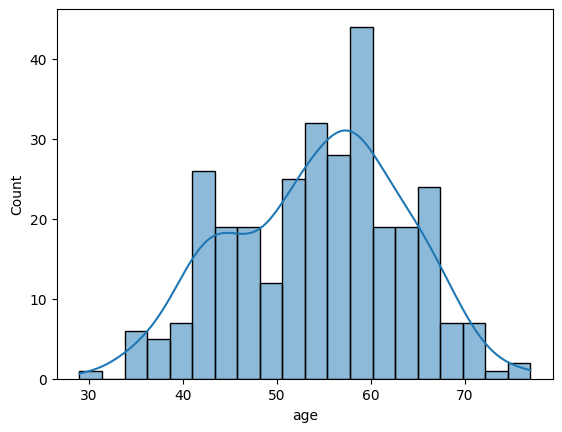

In [9]:
sns.histplot(df['age'],bins=20,kde = True)

### Let's plot a scatter plot of Age vs Cholesterol, with colors representing the presence of heart disease.
This helps us see patterns and relationships between age, cholesterol, and heart disease risk

<Axes: xlabel='age', ylabel='chol'>

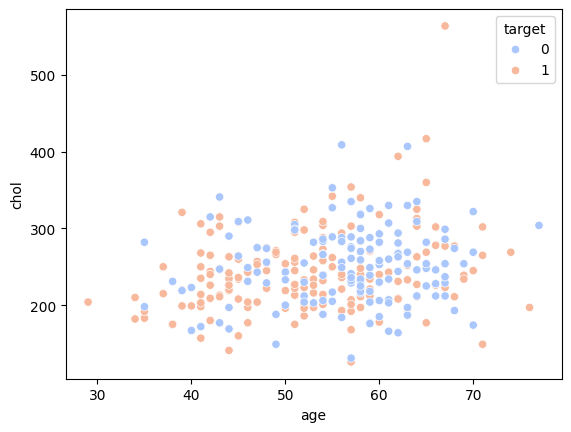

In [11]:
sns.scatterplot(data=df,x='age',y='chol',hue='target', palette="coolwarm")

### Correlation Heatmap of All Features in the Dataset
This heatmap helps us quickly identify which features are strongly related to each other and to the target, providing insights into potential risk factors for heart disease.


<Axes: >

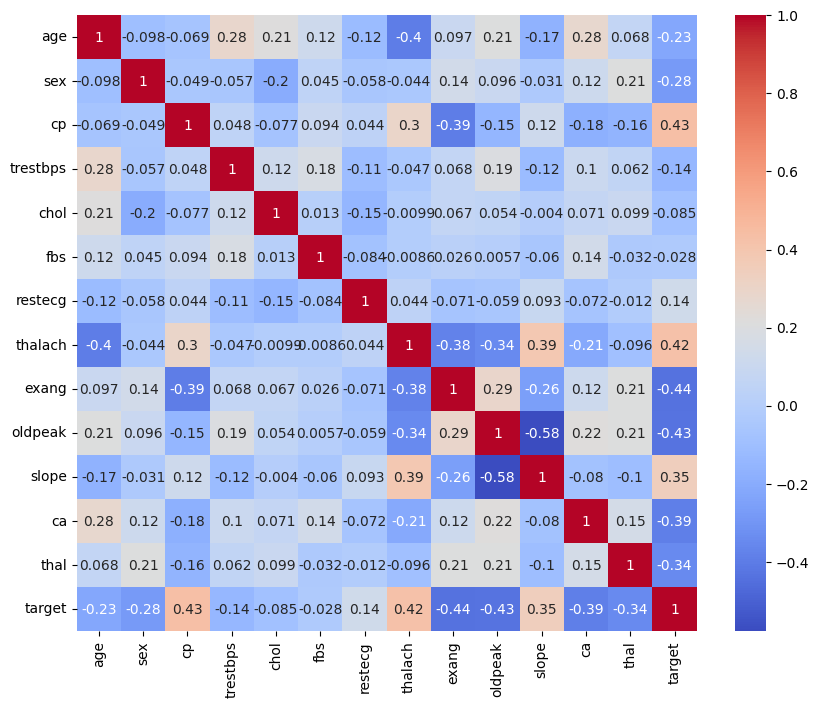

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Separating Features and Target
Here, `X` contains all the independent variables (features) by dropping the `target` column,        
while `y` contains the dependent variable (`target`) that we want to predict.


In [13]:
X = df.drop('target', axis=1)
y = df['target']

### Splitting the Dataset into Training and Testing Sets
We divide the data into training and testing sets using `train_test_split` from `sklearn.model_selection`.  
- `X_train` and `y_train` will be used to train the model.  
- `X_test` and `y_test` will be used to evaluate the model’s performance.  
Here, 33% of the data is reserved for testing, and `random_state=42` ensures reproducibility.


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### We have discussed that why Standardization is Needed
KNN relies on distances between data points. If the features are on different scales, some columns may dominate others. Standardizing the features ensures all columns contribute equally to the distance calculations.


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating the KNN Classifier
We are using KNN to predict heart disease. `k` tells the model how many neighbors to check. For now, we start with `k = 4` and will find the best value later.
.


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

### Training the KNN Model
Here, we train the KNN classifier using the training data (`X_train` and `y_train`) so it can learn patterns to make predictions.


In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

### Making Predictions
We use the trained KNN model to predict the target values for the test data (`X_test`). The predictions are stored in `y_pred`.


In [29]:
y_pred = knn.predict(X_test)

### Model Evaluation
After training the model and making predictions, we evaluate its performance using the accuracy scor `(sklearn.metrics)`e to see how well it predicts heart disease.


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9180327868852459

### Finding the Best k Value
Here, we test different values of `k` from 1 to 15 to see which one gives the highest accuracy.  
For each `k`, we train the KNN model, make predictions on the test set, and store the accuracy in the `score` list.


In [31]:
scores = []
for k in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(accuracy_score(y_test,y_pred))

### Visualizing Accuracy for Different k Values
We plot the accuracy scores for `k` values from 1 to 15.  
This helps us see which `k` gives the best performance for our KNN classifier.


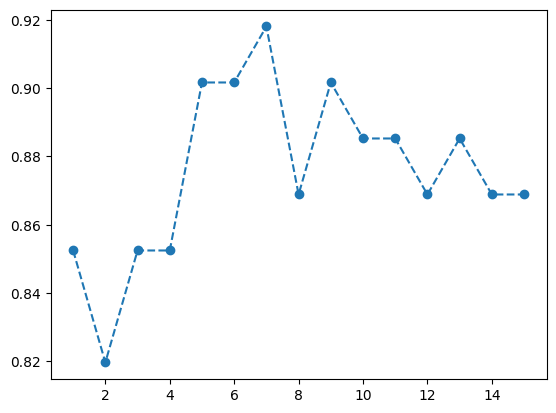

In [32]:
plt.plot(range(1,16),scores,marker='o',linestyle='--')